## Introduction to computer vision

Computer vision is the practice of writing algorithms which can discover patterns in visual data such as the camera of self driving car recognizing the car in front

In [6]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-08-07 06:07:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.9MB/s    in 5.5s    

2024-08-07 06:07:19 (19.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data

A very crucial step at the beginning of any ml project is becoming one with the data.

And for a computer vision project... this means visualizing many samples of data

In [7]:
!ls pizza_steak

test  train


In [8]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [9]:
import os

for dirpath, dirname, filename in os.walk('pizza_steak'):
  print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}")



There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [10]:
# another way to find out how many images are in a file
steak_images_train = os.listdir('pizza_steak/train/steak')
len(steak_images_train)

750

In [11]:
os.listdir('pizza_steak')

['test', 'train']

In [12]:
# Get the classnames programmatically
from pathlib import Path

classes = Path('pizza_steak/train').glob('*')
for cl in classes:
  print(f'{cl.name}')

steak
pizza


In [13]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['pizza' 'steak']


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Imaage shape {img.shape}")
  return img

Imaage shape (512, 512, 3)


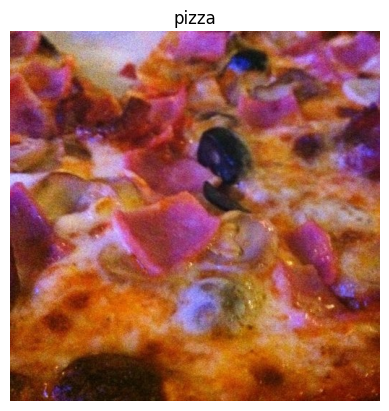

In [15]:
img = view_random_image(target_dir='pizza_steak/train',
                        target_class='pizza')

In [16]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[134,  66,  53],
        [134,  66,  53],
        [135,  65,  57],
        ...,
        [ 57,  21,   9],
        [ 64,  28,  14],
        [ 68,  32,  18]],

       [[120,  52,  41],
        [134,  66,  55],
        [138,  70,  61],
        ...,
        [ 61,  23,  12],
        [ 66,  28,  15],
        [ 64,  26,  13]],

       [[120,  53,  44],
        [134,  67,  59],
        [129,  60,  55],
        ...,
        [ 73,  33,  23],
        [ 75,  35,  23],
        [ 66,  27,  12]],

       ...,

       [[ 62,  21,   0],
        [ 67,  25,   3],
        [ 69,  24,   3],
        ...,
        [ 62,  18,   5],
        [ 59,  17,   3],
        [ 59,  17,   3]],

       [[ 62,  22,   0],
        [ 66,  24,   0],
        [ 67,  22,   0],
        ...,
        [ 66,  24,  10],
        [ 68,  26,  12],
        [ 61,  19,   5]],

       [[ 73,  33,   8],
        [ 75,  33,   9],
        [ 73,  28,   5],
        ...,
        [ 70,  28,  1

In [17]:
img.shape

(512, 512, 3)

In [18]:
# normalize the image
img/255.

array([[[0.5254902 , 0.25882353, 0.20784314],
        [0.5254902 , 0.25882353, 0.20784314],
        [0.52941176, 0.25490196, 0.22352941],
        ...,
        [0.22352941, 0.08235294, 0.03529412],
        [0.25098039, 0.10980392, 0.05490196],
        [0.26666667, 0.1254902 , 0.07058824]],

       [[0.47058824, 0.20392157, 0.16078431],
        [0.5254902 , 0.25882353, 0.21568627],
        [0.54117647, 0.2745098 , 0.23921569],
        ...,
        [0.23921569, 0.09019608, 0.04705882],
        [0.25882353, 0.10980392, 0.05882353],
        [0.25098039, 0.10196078, 0.05098039]],

       [[0.47058824, 0.20784314, 0.17254902],
        [0.5254902 , 0.2627451 , 0.23137255],
        [0.50588235, 0.23529412, 0.21568627],
        ...,
        [0.28627451, 0.12941176, 0.09019608],
        [0.29411765, 0.1372549 , 0.09019608],
        [0.25882353, 0.10588235, 0.04705882]],

       ...,

       [[0.24313725, 0.08235294, 0.        ],
        [0.2627451 , 0.09803922, 0.01176471],
        [0.27058824, 0

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(2,2),
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
histroy1 = model1.fit(train_data,
                      epochs=5,
                      validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.6198 - loss: 0.6332 - val_accuracy: 0.7900 - val_loss: 0.4628
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.7718 - loss: 0.4692 - val_accuracy: 0.8440 - val_loss: 0.4103
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 596ms/step - accuracy: 0.8007 - loss: 0.4255 - val_accuracy: 0.8500 - val_loss: 0.3608
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.8517 - loss: 0.3668 - val_accuracy: 0.8520 - val_loss: 0.3535
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8964 - loss: 0.2675 - val_accuracy: 0.8360 - val_loss: 0.3698


In [26]:
len(train_data)

47

In [27]:
len(valid_data)

16

In [28]:
# building another model
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history2 = model2.fit(train_data,
                      epochs=5,
                      validation_data=valid_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.4784 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.5089 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.4782 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [29]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 223, 223, 10)        │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 221, 221, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,855 (362.72 KB)

 Trainable params: 30,951 (120.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,904 (241.82 KB)

In [30]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than CNN (model1), model2 performs terribly